<a href="https://colab.research.google.com/github/p4arth/SigmaTasks/blob/main/airlinedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# Importing required libraries
import pandas as pd
import numpy as np
import plotly.io as pio
pio.renderers 
# Importing pie chart libraries
import plotly.express as px
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

/usr/local/bin/orca: Text file busy
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgtk2.0-0 is already the newest version (2.24.32-1ubuntu1).
libgconf-2-4 is already the newest version (3.2.6-4ubuntu1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.8).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [5]:
# Reading the csv file using pandas
df = pd.read_csv('star.csv', index_col='Unnamed: 0', parse_dates=True)

In [6]:
# Checking the columns
df.columns

Index(['Invoice ID', 'City', 'Seat Type', 'Gender', 'Type', 'Price', 'Date',
       'Payment', 'gross margin percentage', 'gross income', 'Rating',
       'Sandwich', 'Colddrink ', 'Packaged Nuts'],
      dtype='object')

In [7]:
# Seeing the first 5 rows of the data
df.head()

,Invoice ID,City,Seat Type,Gender,Type,Price,Date,Payment,gross margin percentage,gross income,Rating,Sandwich,Colddrink,Packaged Nuts
0,13438,Bangalore,Economy,Female,Senior Citizen,7469.0,05-02-2019,Ewallet,4.761905,355.666667,9.1,1,0,0
1,14888,Ahemdabad,Business,Female,Adult,2444.8,18-08-2019,Cash,9.523810,232.838095,9.6,0,1,0
2,17900,Bangalore,Business,Male,Adult,7412.8,04-09-2019,Credit card,9.523810,705.980952,7.4,1,1,1
3,17611,Bangalore,Economy,Male,Senior Citizen,5822.0,18-07-2019,Ewallet,4.761905,277.238095,8.4,0,1,1
4,11855,Bangalore,Business,Male,Student,13809.6,26-04-2019,Ewallet,9.523810,1315.200000,5.3,0,1,1


In [8]:
# The data seems to have null values
df.isnull().sum()

Invoice ID                  0
City                        0
Seat Type                   0
Gender                      0
Type                        0
Price                       0
Date                        0
Payment                     0
gross margin percentage     0
gross income               27
Rating                      0
Sandwich                    0
Colddrink                   0
Packaged Nuts               0
dtype: int64

In [9]:
# Describing the data
df.describe()
# Soms rows in 'Price' column seem to have 0 value which is not possible for a ticket price

,Invoice ID,Price,gross margin percentage,gross income,Rating,Sandwich,Colddrink,Packaged Nuts
count,1003.000000,1003.000000,1003.000000,976.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,14943.966102,7080.844267,6.993306,483.292414,6.972682,0.483549,0.470588,0.487537
std,2896.480986,3859.936321,2.377436,409.246507,1.717647,0.499979,0.499383,0.500094
min,10007.000000,0.000000,4.761905,2.325000,4.000000,0.000000,0.000000,0.000000
25%,12383.000000,3962.600000,4.761905,182.809524,5.500000,0.000000,0.000000,0.000000
50%,15068.000000,6889.600000,4.761905,357.052381,7.000000,0.000000,0.000000,0.000000
75%,17497.000000,9356.000000,9.523810,691.733333,8.500000,1.000000,1.000000,1.000000
max,19991.000000,15993.600000,9.523810,1522.133333,10.000000,1.000000,1.000000,1.000000


In [10]:
# Filling the null values in data
df.fillna(df.mean(), inplace = True)

In [11]:
# Null values imputed
df.isnull().sum()

Invoice ID                 0
City                       0
Seat Type                  0
Gender                     0
Type                       0
Price                      0
Date                       0
Payment                    0
gross margin percentage    0
gross income               0
Rating                     0
Sandwich                   0
Colddrink                  0
Packaged Nuts              0
dtype: int64

In [12]:
# Imputing the missing values in 'Price' using the mean of the 'Price' column
mean_price = df['Price'].mean()
df['Price']=df.Price.mask(df.Price == 0,mean_price)

In [13]:
# Defining a function to check weather there are any null values left in 'Price' column or not
def iszero(df):
  for x in df['Price']:
    if x == 0:
      return True
    else:
      return False

In [14]:
# No zeroes left in the column
iszero(df)

False

In [15]:
# Parsing the 'Date' column 
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
# Importing graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns

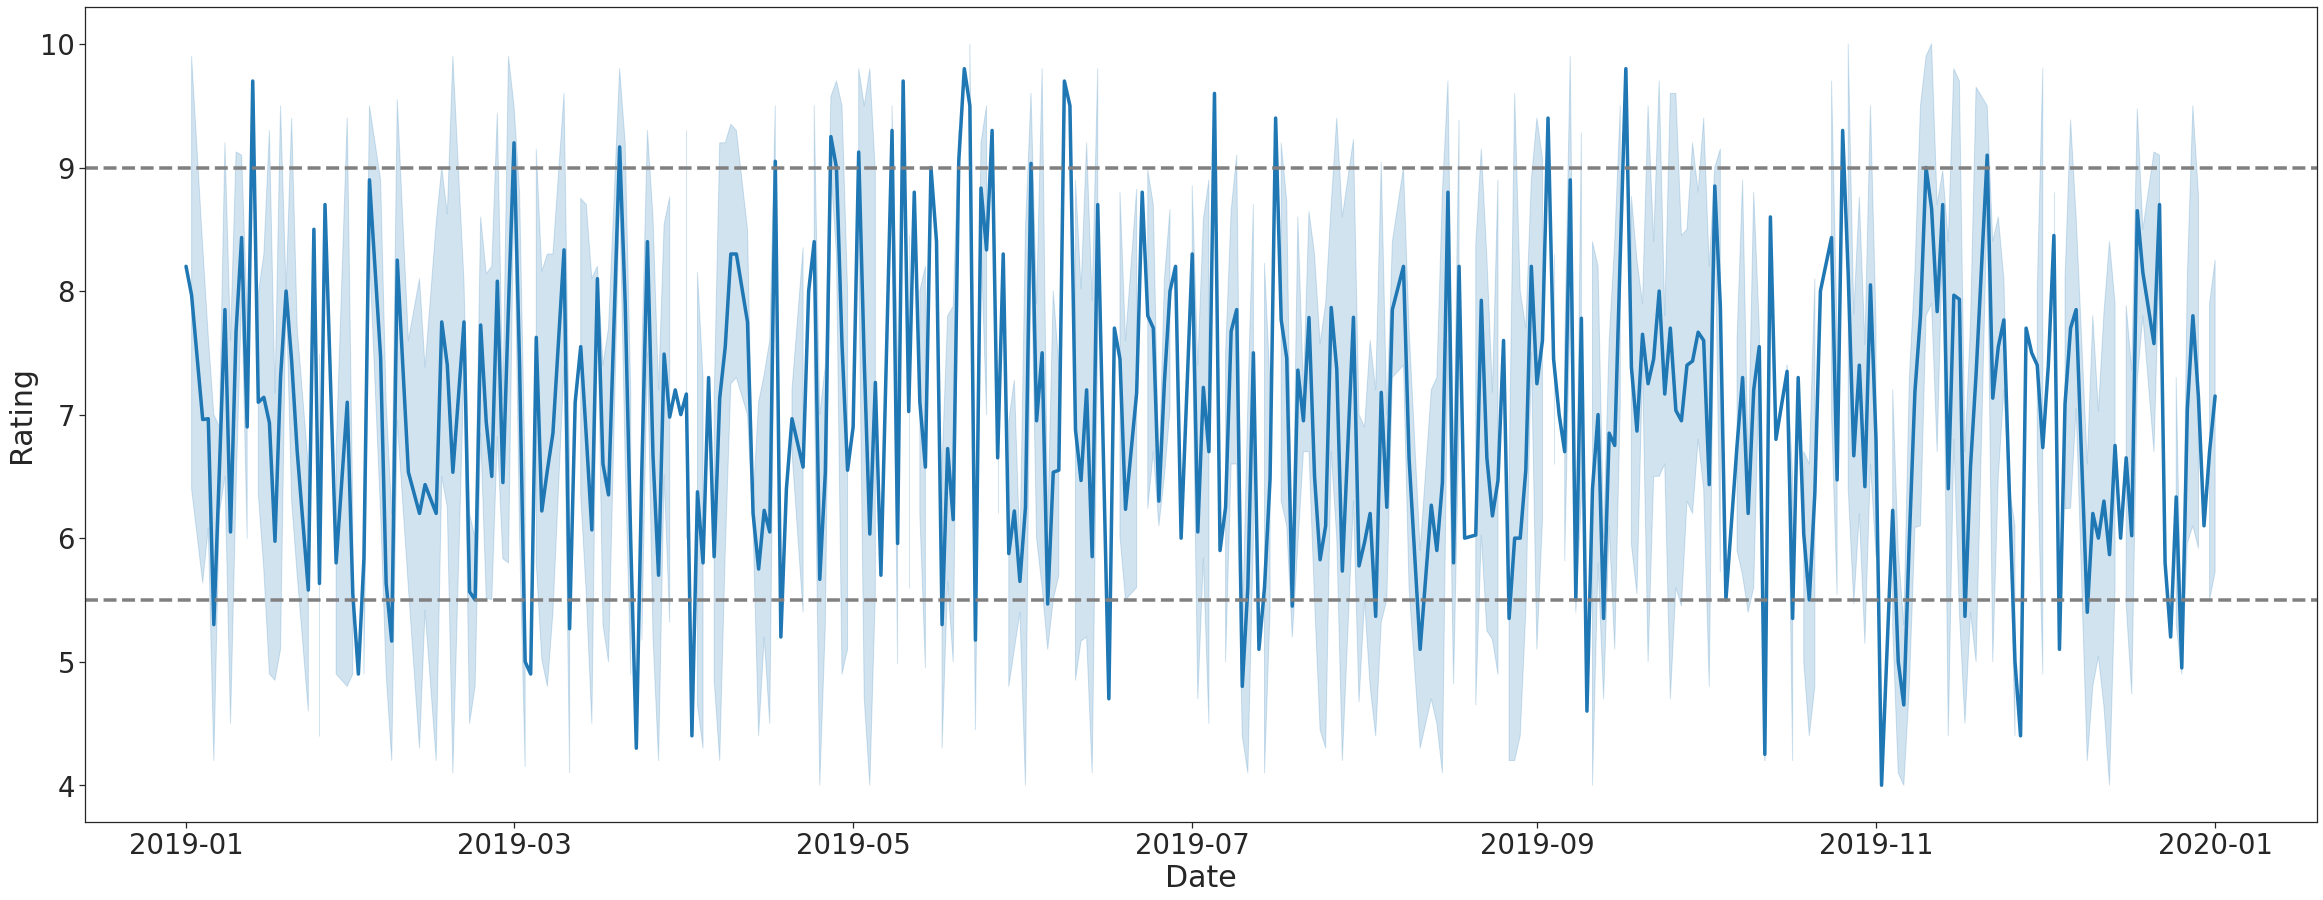

In [17]:
# Plotting a line plot where X-Axis is Date and Y-Axis is the Rating
plt.figure(figsize = (40,15))
sns.set_style("ticks")
sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 3.5})
g = sns.lineplot(x = df['Date'], y = df['Rating'])
g.axhline(y=5.5, ls='--', c='gray')
g.axhline(y=9, ls='--', c='gray')

# ***The rating towards the end of the year which are essentially the winter months seems to be lower when comapred to the mid-year which essentially are the summer months seems to be higher.***



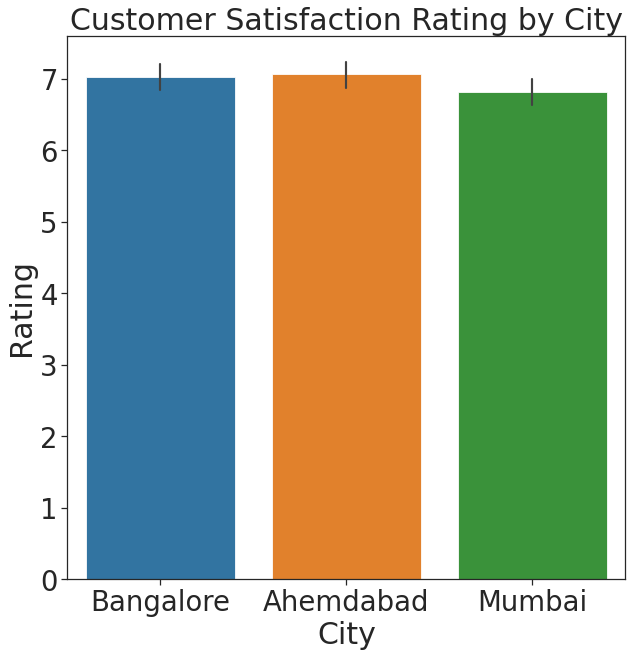

In [18]:
# BarPlot Showing customer satisfaction by city
plt.figure(figsize = (10,10))
plt.title("Customer Satisfaction Rating by City")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":18}) 
sns.barplot(x = df['City'], y=df['Rating'])

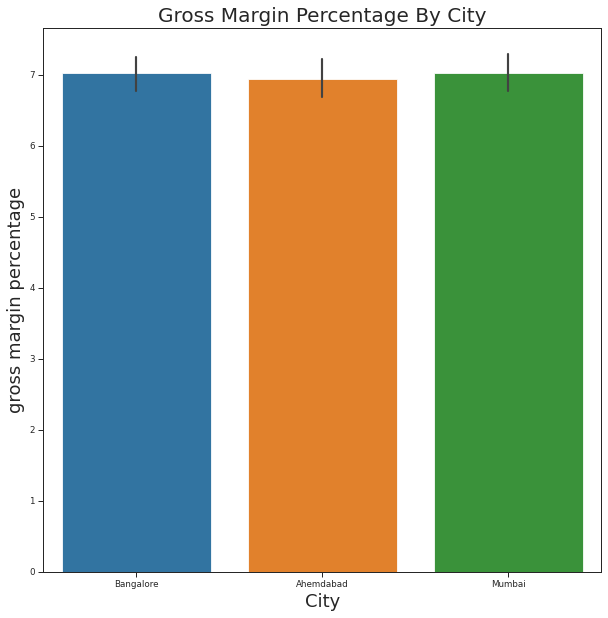

In [19]:
# BarPlot showing Gross Margin Percentage by city
plt.figure(figsize = (10,10))
plt.title("Gross Margin Percentage By City")
sns.barplot(x = df['City'], y=df['gross margin percentage'])

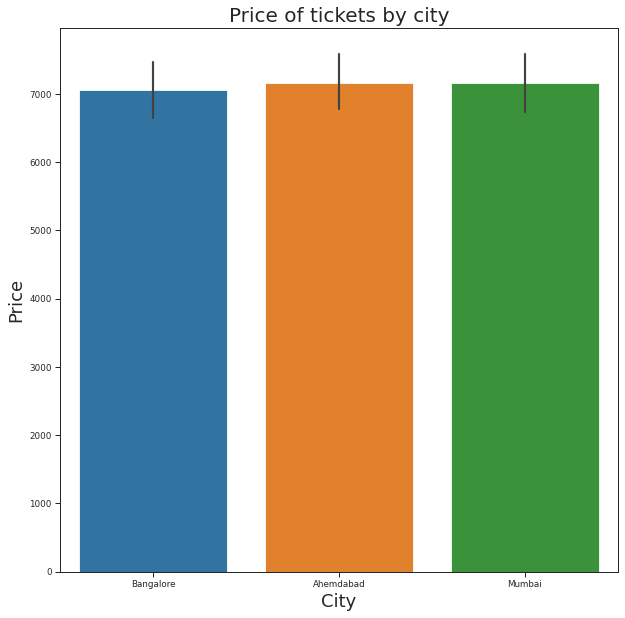

In [20]:
# BarPlot showing the price of tickets by city
plt.figure(figsize = (10,10))
plt.title("Price of tickets by city")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":18}) 
sns.barplot(x = df['City'], y=df['Price'])

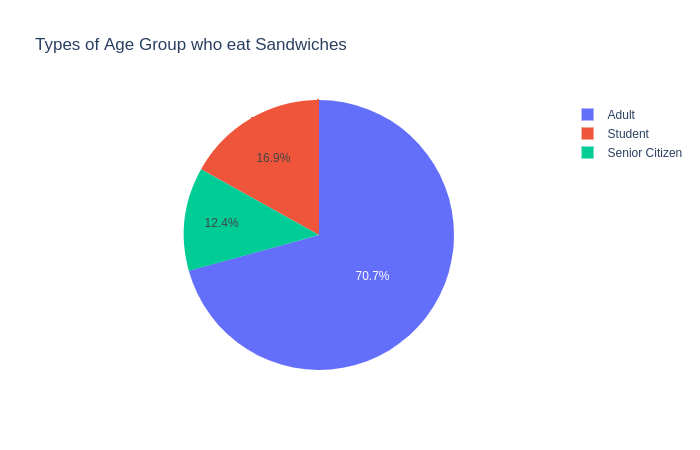

In [38]:
fig = px.pie(values=df['Sandwich'], names = df['Type'], title = 'Types of Age Group who eat Sandwiches')
fig.show(renderer='png')

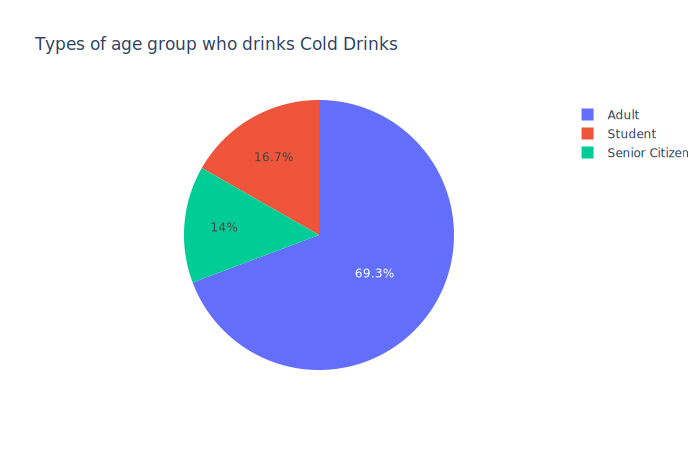

In [42]:
# PieChart of Type of Age groups who drink Cold Drinks
fig2=px.pie(values=df['Colddrink '], names = df['Type'], title = "Types of age group who drinks Cold Drinks")
fig2.show(renderer="svg")

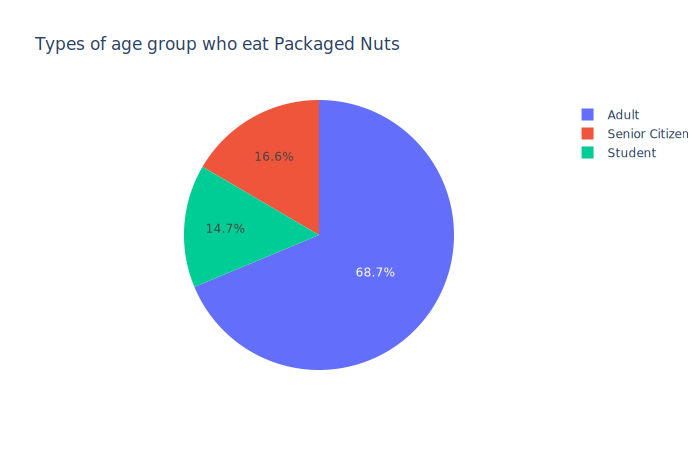

In [43]:
# PieChart of Type of Age groups who eat Packaged Nuts
fig3=px.pie(values=df['Packaged Nuts'], names = df['Type'], title = "Types of age group who eat Packaged Nuts")
fig3.show(renderer="svg")